In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [141]:
runs = 200
steps = 1000
bandits = 10

In [142]:
q = np.zeros(bandits) # true values
results = np.zeros([runs,steps-1])
optimal = np.zeros([runs,steps-1])
results2 = np.zeros([runs,steps-1])
optimal2 = np.zeros([runs,steps-1])

In [143]:
for i in range(bandits):
    q[i] = np.random.normal(0,1)

In [144]:
for k in range(runs):
    R = np.zeros([steps,bandits]) # actual rewards
    gained_reward = np.zeros(steps-1) # gained reward in each step
    A = np.zeros(steps) # selected actions
    opt = np.zeros(steps-1) # percentage of optimal choice
    Q = np.full(bandits, 5.0)
    counts = np.zeros(bandits) # counts of numbers each bandit was selected
    for j in range(steps-1):
        index = np.where(Q == np.amax(Q))
        A[j] = random.choice(index[0])
        idx = A[j].astype(int)
        counts[idx] = counts[idx] + 1
        R[j,idx] = np.random.normal(q[idx],1)
        gained_reward[j] = R[j,idx]
        Q[idx] = Q[idx] + .1 * (R[j,idx] - Q[idx])
        if idx == np.argmax(q): 
            opt[j] = 100
    results[k,] = np.cumsum(gained_reward)/np.arange(1,steps)
    optimal[k,] = np.cumsum(opt)/np.arange(1,steps)

In [145]:
for k in range(runs):
    R = np.zeros([steps,bandits]) # actual rewards
    gained_reward = np.zeros(steps-1) # gained reward in each step
    A = np.zeros(steps) # selected actions
    opt = np.zeros(steps-1) # percentage of optimal choice
    Q = np.zeros(bandits)
    counts = np.zeros(bandits) # counts of numbers each bandit was selected
    for j in range(steps-1):
        if np.random.rand() < .1:
            A[j] = np.random.randint(bandits)
        else:
            index = np.where(Q == np.amax(Q))
            A[j] = random.choice(index[0])
        idx = A[j].astype(int)
        counts[idx] = counts[idx] + 1
        R[j,idx] = np.random.normal(q[idx],1)
        gained_reward[j] = R[j,idx]
        Q[idx] = Q[idx] + .1 * (R[j,idx] - Q[idx])
        if idx == np.argmax(q): 
            opt[j] = 100
    results2[k,] = np.cumsum(gained_reward)/np.arange(1,steps)
    optimal2[k,] = np.cumsum(opt)/np.arange(1,steps)

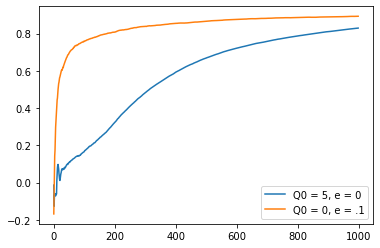

In [146]:
plt.plot(range(steps-1), np.mean(results,0), label = 'Q0 = 5, e = 0')
plt.plot(range(steps-1), np.mean(results2,0), label = 'Q0 = 0, e = .1')
plt.legend()

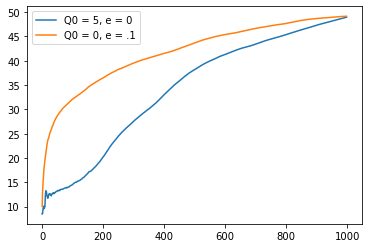

In [147]:
plt.plot(range(steps-1), np.mean(optimal,0), label = 'Q0 = 5, e = 0')
plt.plot(range(steps-1), np.mean(optimal2,0), label = 'Q0 = 0, e = .1')
plt.legend()